<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/K_najblizszych_sasiadow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
np.random.seed(42)
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

In [4]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(raw_data["DESCR"])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
all_data = raw_data.copy()
data =all_data["data"]
target =all_data["target"]
data[: 10], target[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [7]:
df = pd.DataFrame(data = np.c_[data, target], columns=all_data["feature_names"] +['class'])
df
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df['class'].unique()


array([0., 1., 2.])

In [9]:
np.unique(all_data["target_names"])


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [12]:
df['class'].value_counts()

,count
class,
0.0,50
1.0,50
2.0,50


In [13]:
#wykres rozproszenia

In [14]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

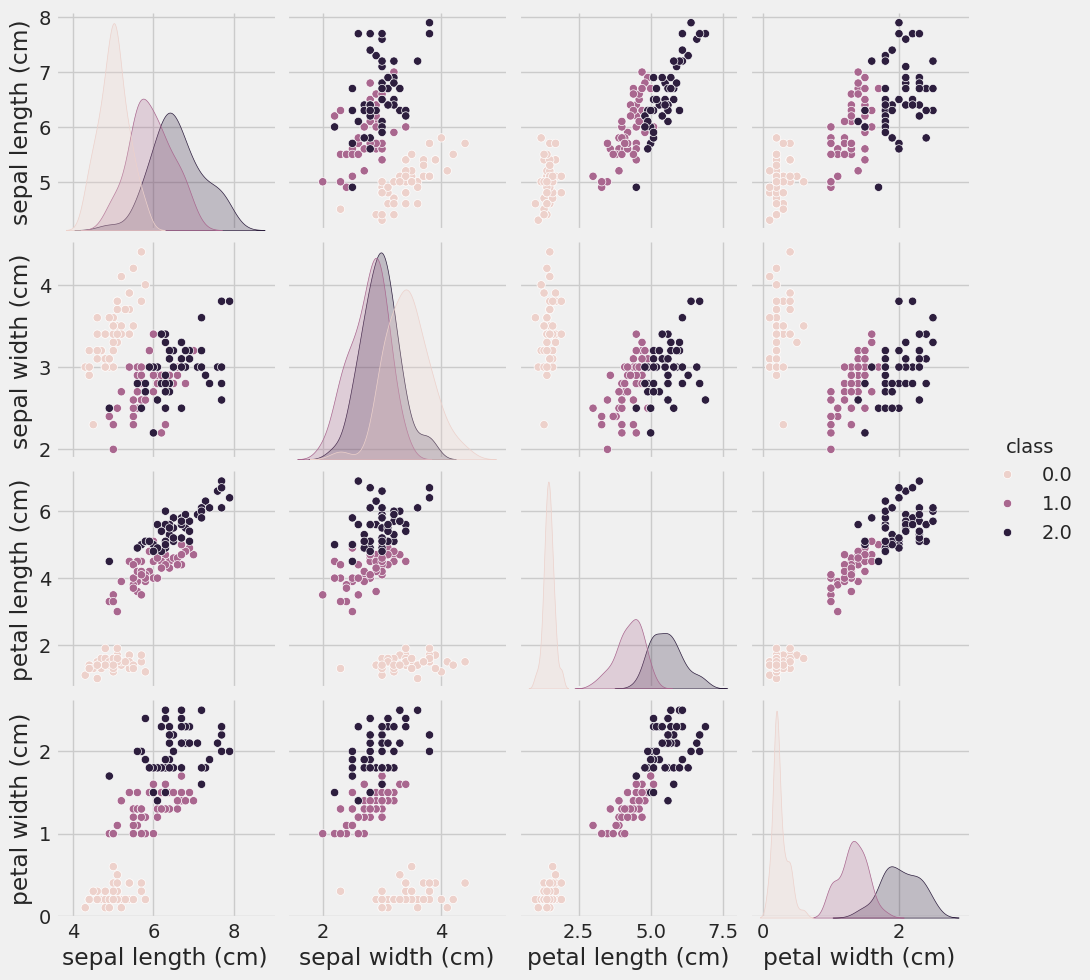

In [15]:
_= sns.pairplot(df, vars = all_data["feature_names"], hue = 'class')

In [16]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [21]:
data = data[:,:2] #usuwamy zmienne z najwieksza korelacja

In [20]:
data.shape, target.shape

((150, 2), (150,))

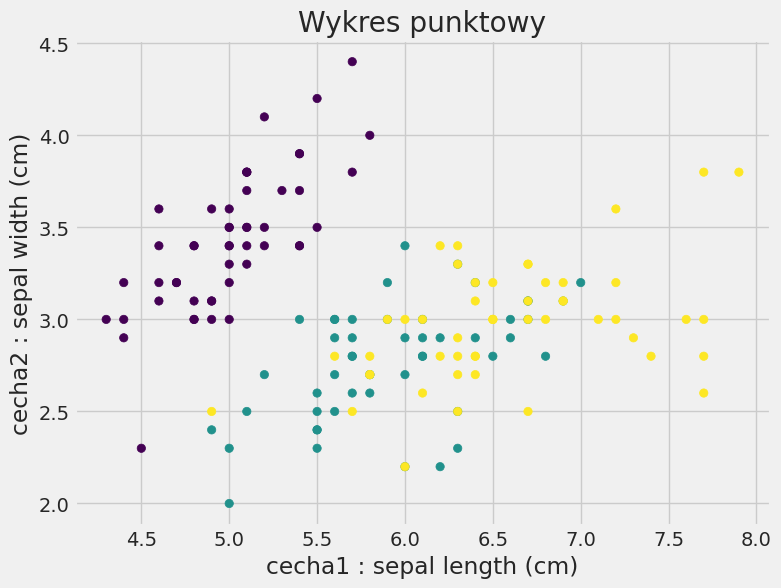

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c=target, cmap = "viridis")
plt.title("Wykres punktowy")
plt.xlabel("cecha1 : sepal length (cm)")
plt.ylabel("cecha2 : sepal width (cm)")
plt.show()

In [28]:
df = pd.DataFrame(data = np.c_[data, target], columns=['sepal_lenght', 'sepal_width', 'class'] )
px.scatter(df, x='sepal_lenght', y='sepal_width', color='class', width = 900)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data, target)

KNeighborsClassifier()

In [31]:
#wykres granic decyzyjnych

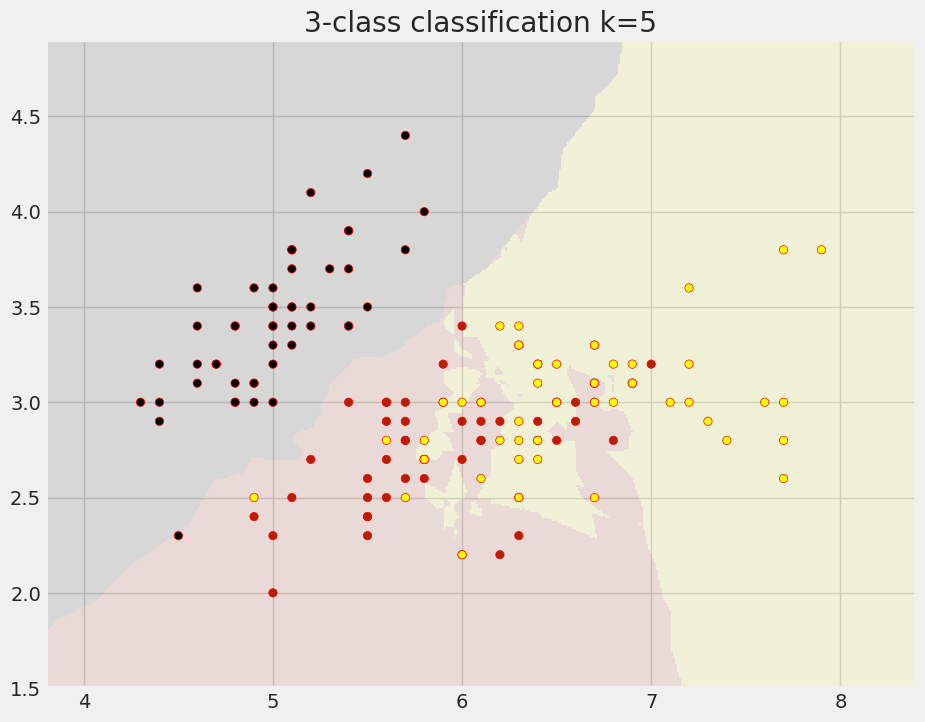

In [33]:
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k=5')
plt.show()


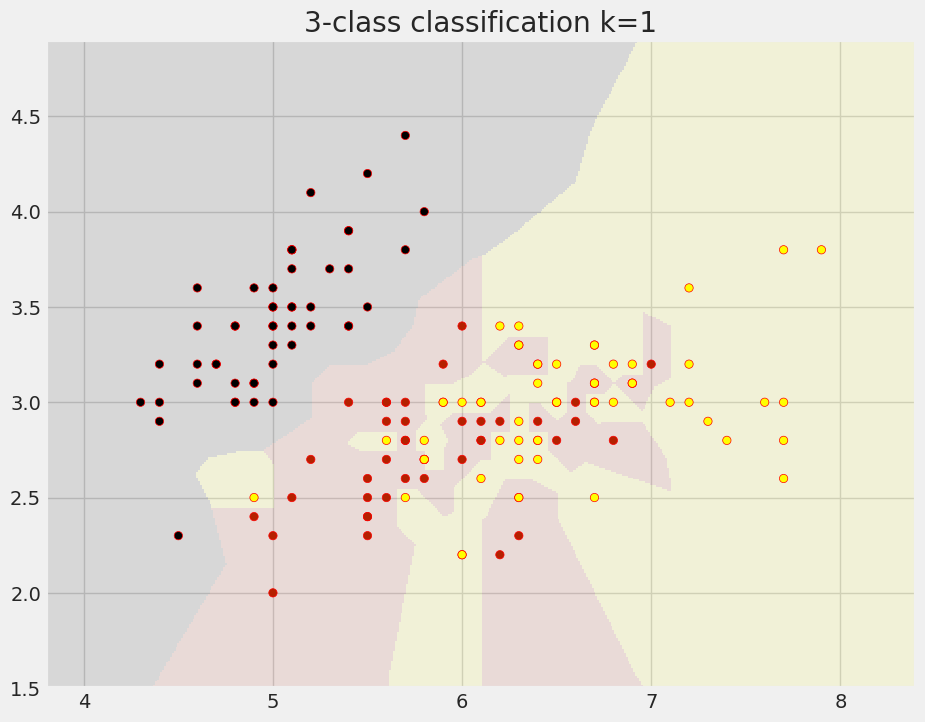

In [36]:

 def plot_decision_boundries(n_neighbors=1):

    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(data, target)

    x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
    y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={n_neighbors}')
    plt.show()

plot_decision_boundries()

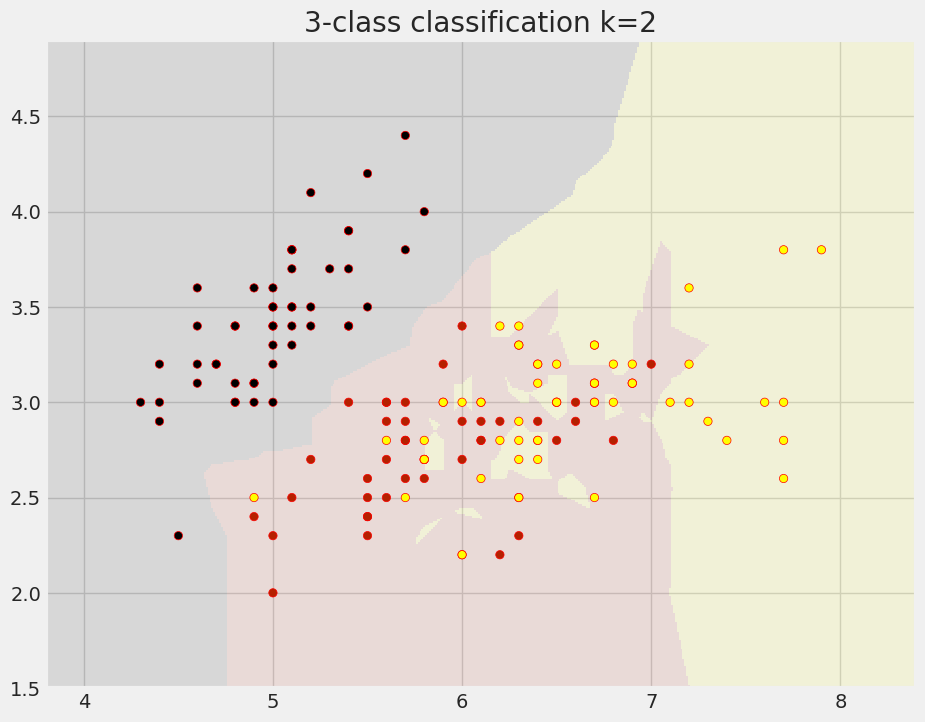

In [38]:
plot_decision_boundries(2)

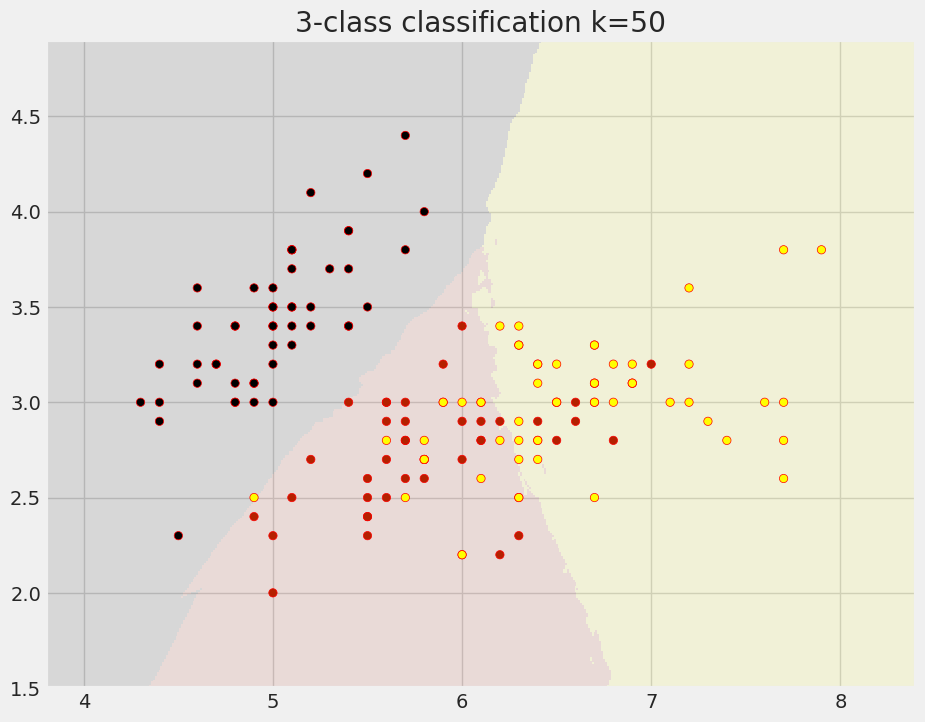

In [39]:
plot_decision_boundries(50)

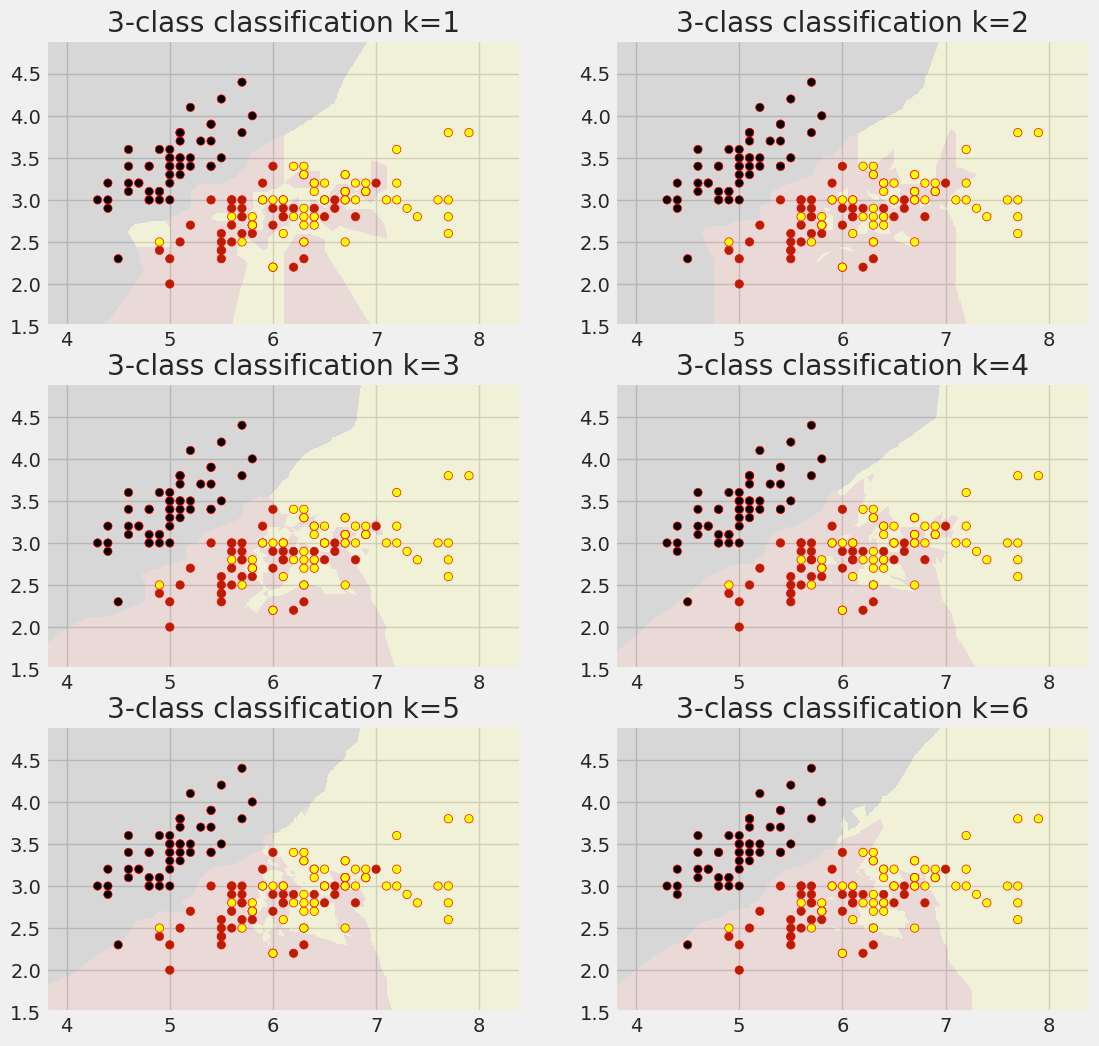

In [40]:
plt.figure(figsize=(12, 12))

for i in range(1, 7):
    plt.subplot(3, 2, i)

    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(data, target)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(mesh)
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}')

plt.show()